In [30]:
import pandas as pd
df= pd.read_csv("heart.csv")               

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [32]:
from sklearn.model_selection import train_test_split 
X, y= df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.4, random_state=9)


In [33]:
###Scale-Insensitive 

In [34]:
from sklearn.ensemble import RandomForestClassifier 

forest= RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [36]:
from sklearn.ensemble import GradientBoostingClassifier 

gb_clf= GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [37]:
###Scale-Sensitive

In [38]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [40]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)


LogisticRegression()

In [41]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC()

In [42]:
forest.score(X_test,y_test)

0.9853658536585366

In [43]:
nb_clf.score(X_test,y_test)

0.8463414634146341

In [44]:
gb_clf.score(X_test,y_test)

0.9707317073170731

In [45]:
knn.score(X_test_scaled,y_test)

0.8536585365853658

In [46]:
log.score(X_test_scaled,y_test)

0.8731707317073171

In [47]:
svc.score(X_test_scaled,y_test)

0.9341463414634147

In [48]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print("Forest:",recall_score(y_test,y_preds))

y_preds = nb_clf.predict(X_test)
print("NB:",recall_score(y_test,y_preds))

y_preds = gb_clf.predict(X_test)
print("GB:",recall_score(y_test,y_preds))

y_preds = knn.predict(X_test_scaled)
print("KNN:",recall_score(y_test,y_preds))

y_preds = log.predict(X_test_scaled)
print("Log:",recall_score(y_test,y_preds))

y_preds = svc.predict(X_test_scaled)
print("SVC:",recall_score(y_test,y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
Log: 0.92018779342723
SVC: 0.9530516431924883


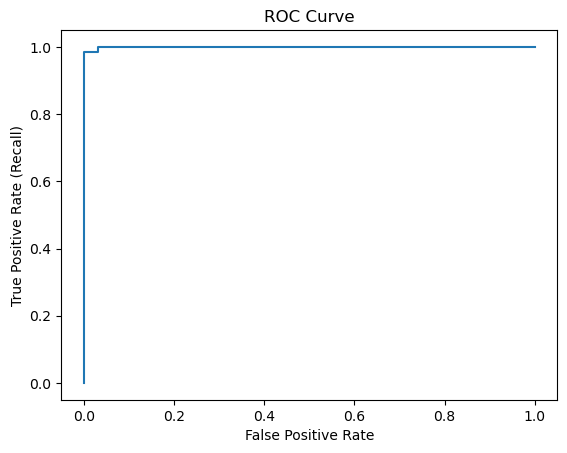

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:, 1]

fpr,tpr, thresholds = roc_curve(y_test,y_probs)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()



In [50]:
roc_auc_score(y_test,y_probs)

0.9995710302423678

In [51]:
### Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100,200,500],
    "max_depth" : [None, 10,20,30],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4],
    "max_features" : ["sqrt","log2", None]}

forest = RandomForestClassifier(n_jobs= -1, random_state= 9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs =-1, verbose=2)

In [53]:

# Ensure the grid search is properly fitted before accessing best_estimator_
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are defined elsewhere in the notebook
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Access the best estimator after fitting
best_forest = grid_search.best_estimator_
print("Best estimator:", best_forest)


Best estimator: RandomForestClassifier(max_depth=10)


In [54]:
##Feature Importances

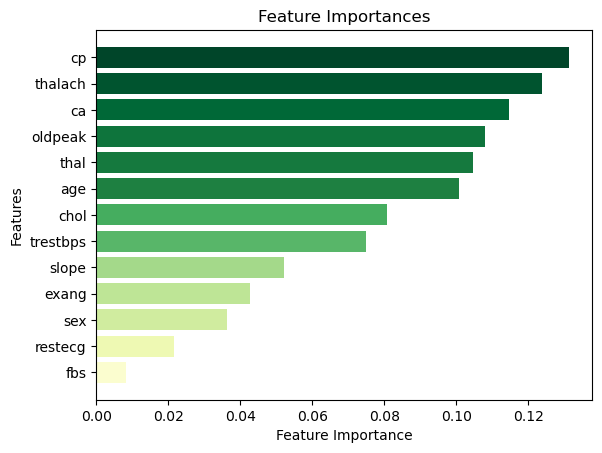

In [55]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features= features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features,sorted_importances, color =colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

<Axes: >

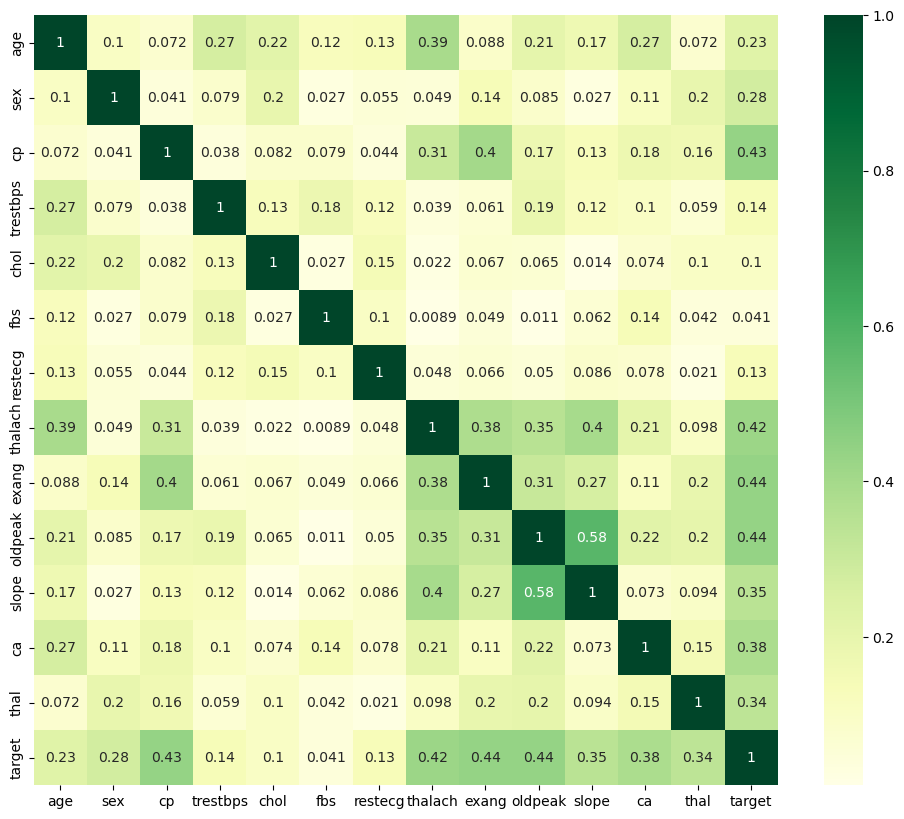

In [87]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap="YlGn")